# Plots

## EEG

In [ ]:
from utils.data import read_data_with_structure
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
import pandas as pd

dataset = "./cl_drive/"

eeg = read_data_with_structure(
    dataset,
    drop_na=True,
    participant="1716",
    modality="EEG",
)

eeg = eeg[eeg["Complexity_Level"] == 7]
eeg = eeg.iloc[::500]

eeg = eeg.melt(
    id_vars=["Timestamp"],
    value_vars=["TP9", "AF7", "AF8", "TP10"],
    var_name="Channel",
    value_name="Signal_Value",
)


Dropped Rows: 3605/400816 (0.90%)


In [ ]:
eeg_baseline = read_data_with_structure(
    dataset,
    drop_na=True,
    load_baseline=True,
    participant="1716",
    modality="EEG",
)
eeg_baseline = eeg_baseline[eeg_baseline["Complexity_Level"] == 7]
eeg_baseline = eeg_baseline.iloc[::500]

eeg_baseline = eeg_baseline.melt(
    id_vars=["Timestamp"],
    value_vars=["TP9", "AF7", "AF8", "TP10"],
    var_name="Channel",
    value_name="Signal_Value",
)


Dropped Rows: 0/276471 (0.00%)


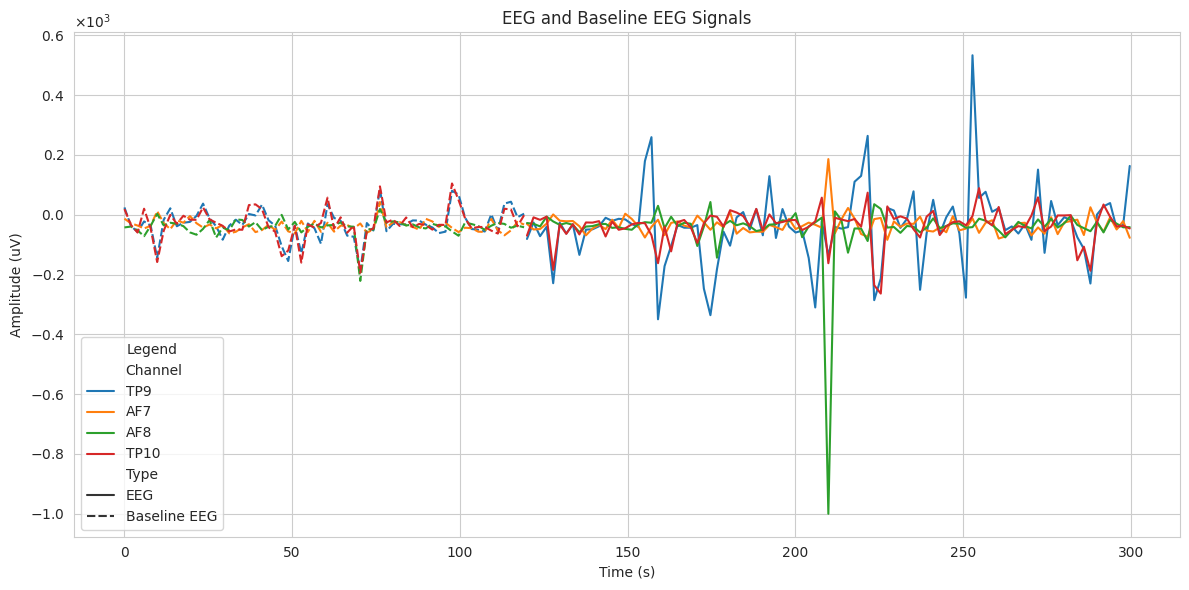

In [3]:
eeg["Type"] = "EEG"
eeg_baseline["Type"] = "Baseline EEG"
combined_data = pd.concat([eeg, eeg_baseline])

sns.set_style(style="whitegrid")
plt.figure(figsize=(12, 6))

sns.lineplot(
    data=combined_data,
    x="Timestamp",
    y="Signal_Value",
    hue="Channel",
    style="Type",
)

ax = plt.gca()
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(axis="y", style="sci", scilimits=(-2, 2))

plt.title("EEG and Baseline EEG Signals")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (uV)")
plt.legend(title="Legend")
plt.tight_layout()
plt.show()


In [ ]:
from scipy.signal import welch

eeg = read_data_with_structure(
    dataset,
    drop_na=True,
    participant="1716",
    modality="EEG",
)

eeg = eeg[eeg["Complexity_Level"] == 7]

eeg = eeg.melt(
    id_vars=["Timestamp"],
    value_vars=["TP9", "AF7", "AF8", "TP10"],
    var_name="Channel",
    value_name="Signal_Value",
)


Dropped Rows: 3605/400816 (0.90%)


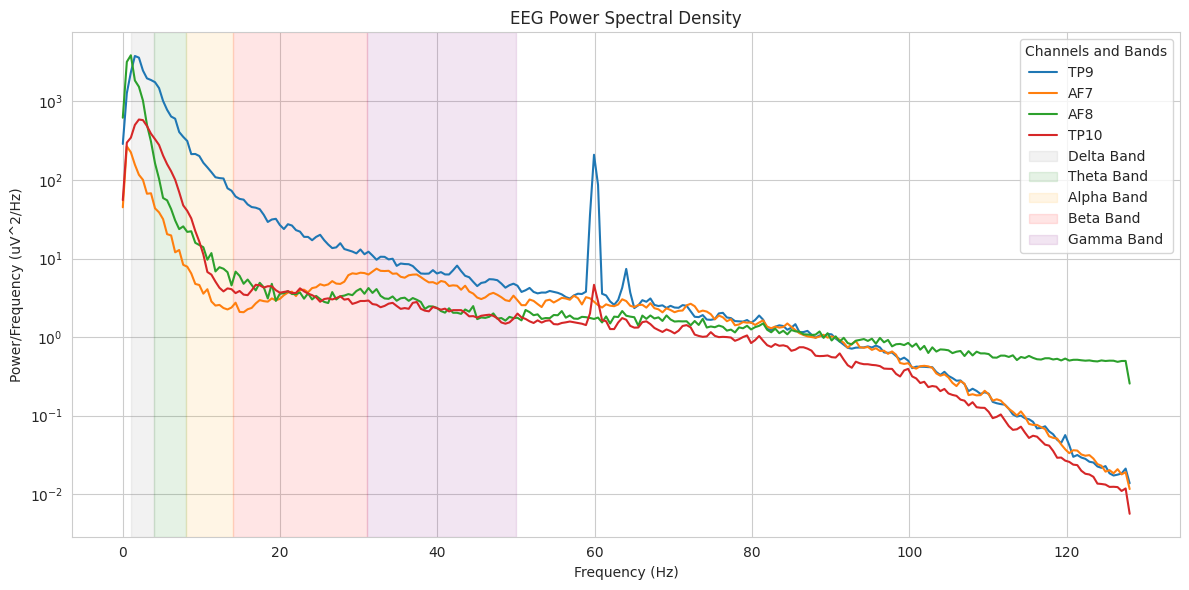

In [8]:
plt.figure(figsize=(12, 6))

channels = ["TP9", "AF7", "AF8", "TP10"]
fs = 256

for channel in channels:
    channel_data = eeg[eeg["Channel"] == channel]["Signal_Value"]
    f, Pxx = welch(channel_data, fs=fs, nperseg=500)
    sns.lineplot(x=f, y=Pxx, label=channel)

band_colors = {
    "Delta (1-4 Hz)": "gray",
    "Theta (4-8 Hz)": "green",
    "Alpha (8-14 Hz)": "orange",
    "Beta (14-31 Hz)": "red",
    "Gamma (31-50 Hz)": "purple",
}

for band, (start, end) in {
    "Delta": (1, 4),
    "Theta": (4, 8),
    "Alpha": (8, 14),
    "Beta": (14, 31),
    "Gamma": (31, 50),
}.items():
    plt.axvspan(
        start,
        end,
        color=band_colors[f"{band} ({start}-{end} Hz)"],
        alpha=0.1,
        label=f"{band} Band",
    )

plt.yscale("log")
plt.title("EEG Power Spectral Density")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power/Frequency (uV^2/Hz)")
plt.legend(title="Channels and Bands")
plt.tight_layout()
plt.show()


## ECG

In [6]:
ecg = read_data_with_structure(
    dataset,
    drop_na=True,
    participant="1716",
    modality="ECG",
)

ecg = ecg[ecg["Complexity_Level"] == 7]
ecg = ecg.iloc[::500]

ecg = ecg.melt(
    id_vars=["Timestamp"],
    value_vars=[
        "ECG LL-RA RAW",
        "ECG LL-RA CAL",
        "ECG LA-RA RAW",
        "ECG LA-RA CAL",
        "ECG Vx-RL RAW",
        "ECG Vx-RL CAL",
    ],
    var_name="Channel",
    value_name="Signal_Value",
)


Dropped Rows: 653328/1453036 (44.96%)


In [7]:
ecg_baseline = read_data_with_structure(
    dataset,
    drop_na=True,
    load_baseline=True,
    participant="1716",
    modality="ECG",
)

ecg_baseline = ecg_baseline[ecg_baseline["Complexity_Level"] == 7]
ecg_baseline = ecg_baseline.iloc[::500]

ecg_baseline = ecg_baseline.melt(
    id_vars=["Timestamp"],
    value_vars=[
        "ECG LL-RA RAW",
        "ECG LL-RA CAL",
        "ECG LA-RA RAW",
        "ECG LA-RA CAL",
        "ECG Vx-RL RAW",
        "ECG Vx-RL CAL",
    ],
    var_name="Channel",
    value_name="Signal_Value",
)


Dropped Rows: 453743/1003060 (45.24%)


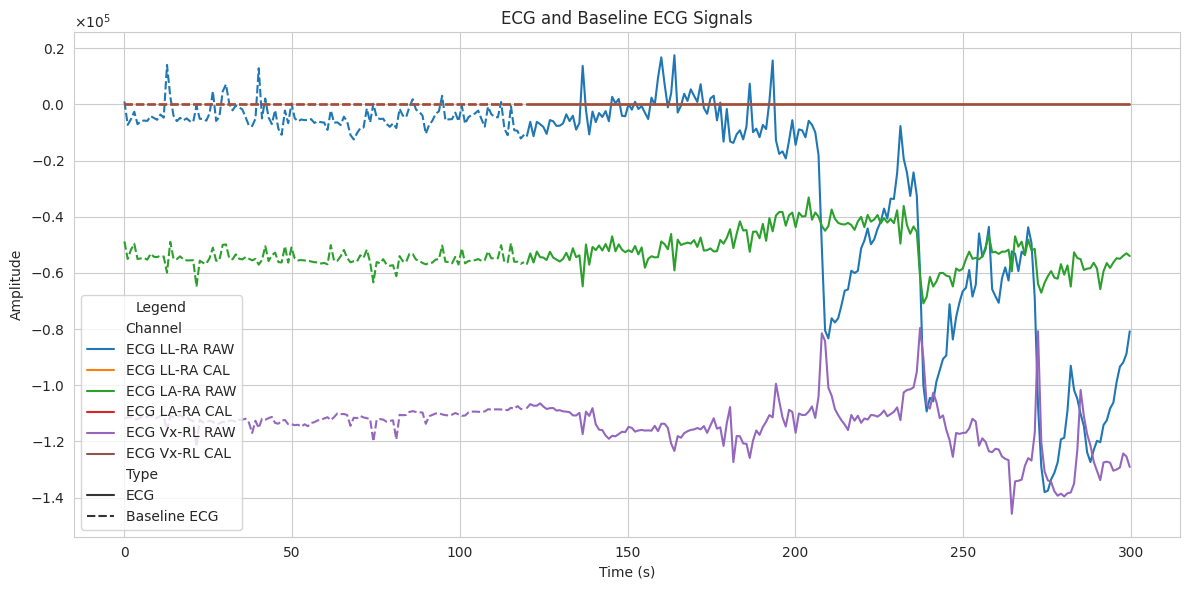

In [8]:
ecg["Type"] = "ECG"
ecg_baseline["Type"] = "Baseline ECG"
combined_data = pd.concat([ecg, ecg_baseline])

sns.set_style(style="whitegrid")
plt.figure(figsize=(12, 6))

sns.lineplot(
    data=combined_data,
    x="Timestamp",
    y="Signal_Value",
    hue="Channel",
    style="Type",
)

ax = plt.gca()
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(axis="y", style="sci", scilimits=(-2, 2))

plt.title("ECG and Baseline ECG Signals")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend(title="Legend")
plt.tight_layout()
plt.show()


## EDA

In [9]:
eda = read_data_with_structure(
    dataset,
    drop_na=True,
    participant="1337",
    modality="EDA",
)

eda = eda[eda["Complexity_Level"] == 3]
eda = eda.iloc[::500]

eda = eda.melt(
    id_vars=["Timestamp"],
    value_vars=[
        "GSR RAW",
        "GSR Resistance CAL",
        "GSR Conductance CAL",
        "GSR RAW.1",
        "GSR Resistance CAL.1",
        "GSR Conductance CAL.1",
    ],
    var_name="Channel",
    value_name="Signal_Value",
)


Dropped Rows: 1489698/1904321 (78.23%)


In [10]:
eda_baseline = read_data_with_structure(
    dataset,
    drop_na=True,
    load_baseline=True,
    participant="1337",
    modality="EDA",
)

eda_baseline = eda_baseline[eda_baseline["Complexity_Level"] == 3]
eda_baseline = eda_baseline.iloc[::500]

eda_baseline = eda_baseline.melt(
    id_vars=["Timestamp"],
    value_vars=[
        "GSR RAW",
        "GSR Resistance CAL",
        "GSR Conductance CAL",
        "GSR RAW.1",
        "GSR Resistance CAL.1",
        "GSR Conductance CAL.1",
    ],
    var_name="Channel",
    value_name="Signal_Value",
)


Dropped Rows: 994531/1270972 (78.25%)


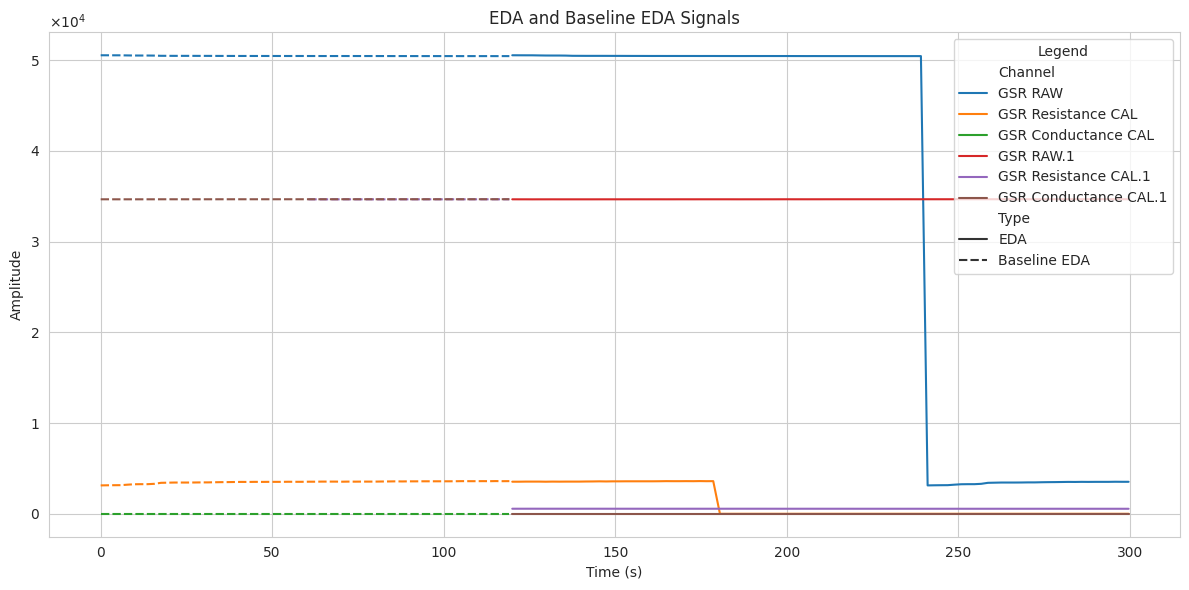

In [11]:
eda["Type"] = "EDA"
eda_baseline["Type"] = "Baseline EDA"
combined_data = pd.concat([eda, eda_baseline])

sns.set_style(style="whitegrid")
plt.figure(figsize=(12, 6))

sns.lineplot(
    data=combined_data,
    x="Timestamp",
    y="Signal_Value",
    hue="Channel",
    style="Type",
)

ax = plt.gca()
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(axis="y", style="sci", scilimits=(-2, 2))

plt.title("EDA and Baseline EDA Signals")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend(title="Legend")
plt.tight_layout()
plt.show()
